In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/body_detection/body_keypoints.csv'
model_save_path = 'model/body_detection/body_detection_model.keras'
tflite_save_path = 'model/body_detection/body_detection_model.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 16

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (6 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED, shuffle=True)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    #input
    tf.keras.layers.Input((6 * 2, ),name='gesture_recognizer_input'),

    #hidden layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='relu'),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),

    #output
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='gesture_recognizer_out')
])

In [9]:
model.summary()  
#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 24)                312       
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                4

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=75,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/75
 1/31 [..............................] - ETA: 17s - loss: 2.8418 - accuracy: 0.0547
Epoch 1: saving model to model/body_detection\body_detection_model.keras
31/31 [==============================] - 1s 9ms/step - loss: 2.5868 - accuracy: 0.1561 - val_loss: 2.7151 - val_accuracy: 0.1165
Epoch 2/75
 1/31 [..............................] - ETA: 0s - loss: 2.2710 - accuracy: 0.2656
Epoch 2: saving model to model/body_detection\body_detection_model.keras
31/31 [==============================] - 0s 4ms/step - loss: 2.1796 - accuracy: 0.3241 - val_loss: 2.5277 - val_accuracy: 0.2604
Epoch 3/75
25/31 [=======================>......] - ETA: 0s - loss: 1.8876 - accuracy: 0.4484
Epoch 3: saving model to model/body_detection\body_detection_model.keras
31/31 [==============================] - 0s 4ms/step - loss: 1.8642 - accuracy: 0.4549 - val_loss: 2.3071 - val_accuracy: 0.4529
Epoch 4/75
23/31 [=====================>........] - ETA: 0s - loss: 1.6243 - accuracy: 0.5435
Epoch 4: saving m

In [13]:
print('acc' , history.history['accuracy'][-1])
print('val_acc' ,history.history['val_accuracy'][-1])

acc 0.891282320022583
val_acc 0.9696048498153687


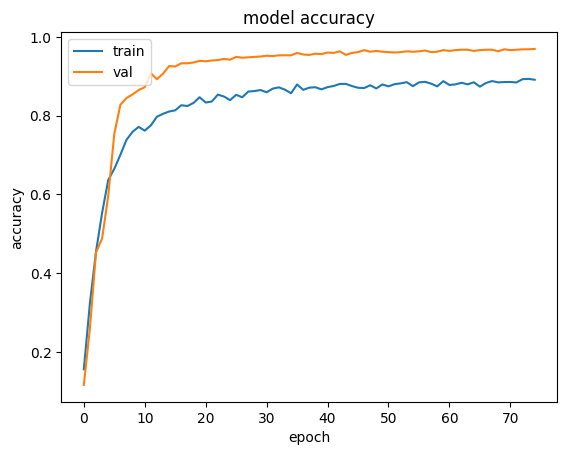

In [14]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

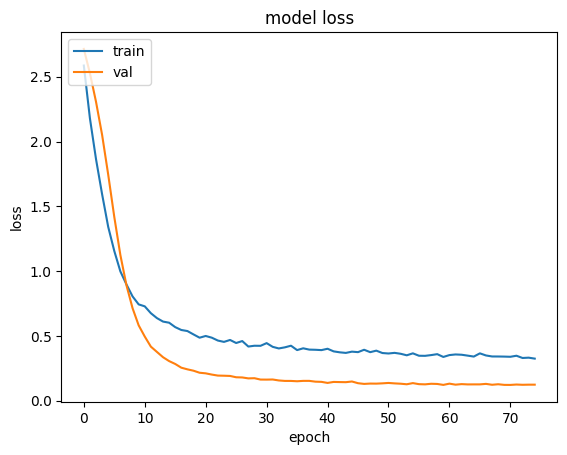

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9696


In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 95ms/step
[3.9599243e-08 7.9797464e-06 2.2230583e-06 6.5805102e-07 1.8279850e-05
 1.7123841e-05 1.1468457e-05 2.1541515e-05 2.9710639e-06 9.9879968e-01
 4.5498477e-05 1.7129394e-05 1.2720450e-04 1.9740958e-06 7.0408213e-09
 9.2622713e-04]
9


In [18]:
accuracy = np.max(predict_result)
accuracy

0.9987997

# Confusion matrix

31/31 [==============================] - 0s 941us/step


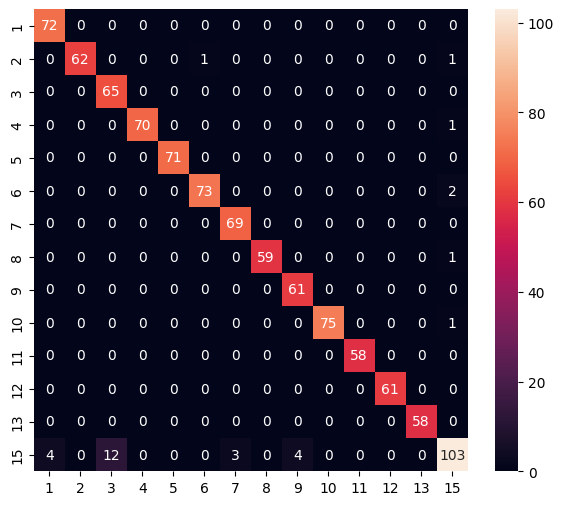

Classification Report
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        72
           2       1.00      0.97      0.98        64
           3       0.84      1.00      0.92        65
           4       1.00      0.99      0.99        71
           5       1.00      1.00      1.00        71
           6       0.99      0.97      0.98        75
           7       0.96      1.00      0.98        69
           8       1.00      0.98      0.99        60
           9       0.94      1.00      0.97        61
          10       1.00      0.99      0.99        76
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        61
          13       1.00      1.00      1.00        58
          15       0.94      0.82      0.88       126

    accuracy                           0.97       987
   macro avg       0.97      0.98      0.98       987
weighted avg       0.97      0.97      0.97       987



In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [20]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [21]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\MONSTER\AppData\Local\Temp\tmpha_y3za5\assets


6688

# Real Time Test

In [3]:
import csv
import copy
import argparse

import cv2
import mediapipe as mp
import tensorflow as tf
import numpy as np
from utils.helper_func import HelperFunc

In [5]:
model = tf.keras.models.load_model('model/body_detection/body_detection_model.keras')

In [6]:
min_detection_confidence = 0.7
min_tracking_confidence = 0.7

In [7]:
with open('model/body_detection/body_gesture_labels.csv',
              encoding='utf-8-sig') as f:
        body_gesture_labels = csv.reader(f)
        body_gesture_labels = [
            row[0] for row in body_gesture_labels
        ]

In [8]:
body_gesture_labels

['UP',
 'DOWN',
 'RIGHT',
 'LEFT',
 'FURTHER',
 'CLOSER',
 'LANDING',
 'TAKE_OFF',
 'PHOTO',
 'VIDEO',
 'VIDEO_STOP',
 'EMERGENCY',
 'FOLLOW',
 'PALM',
 'NO_CLASS']

In [ ]:
functions = HelperFunc()

device = 0
cap = cv2.VideoCapture(device)

use_brect = True
use_pose = True

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

with mp_pose.Pose(
    min_detection_confidence=min_detection_confidence,
    min_tracking_confidence=min_tracking_confidence) as pose:
    
    while cap.isOpened():

        ret,frame = cap.read()

        if not ret:
            print('Ignoring empty camera frame.')
            break

        
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = pose.process(rgb_frame)

        if results.pose_landmarks:
            
            # Landmark list calculation
            landmark_list = functions.calc_landmark_list(rgb_frame, results.pose_landmarks,use_pose)
            # Preprocessing landmark list
            pre_processed_landmark_list = functions.pre_process_landmark(landmark_list)

            # Inference test
            predict_result = model.predict(np.array([pre_processed_landmark_list]),verbose=0)
            body_sign_id = np.argmax(np.squeeze(predict_result))
            accuracy = np.max(predict_result)
            accuracy = round(accuracy, 2)

            if accuracy > 0.70:
                # Bounding box calculation
                brect = functions.calc_bounding_rect(rgb_frame, results.pose_landmarks)
                # Drawing the bounding box on the frame
                frame = functions.rect_corners(frame, brect)

                # Draw the pose annotation on the image.
                frame.flags.writeable = True

                mp_drawing.draw_landmarks(
                    frame,
                    results.pose_landmarks,
                    mp_pose.POSE_CONNECTIONS,
                    connection_drawing_spec = mp_drawing.DrawingSpec(color=(121,44,250), thickness=2),
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2,circle_radius=2))
                                
                info_text = body_gesture_labels[body_sign_id-1] +' '+str(accuracy)
                frame = functions.text_with_background(
                            frame,
                            info_text,
                            (brect[0],brect[1])
                        )                

        # Display the frame
        cv2.imshow('Hand Detection', frame)

        # Break the loop if 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
